<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [7]:
## Write your code here
duplicate_rows =df[df.duplicated()]
print(len(duplicate_rows))

df.drop_duplicates(inplace=True)
duplicate_rows =df[df.duplicated()]
print(len(duplicate_rows))

0
0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [8]:
## Write your code here
missing_values_codingActivities = df['CodingActivities'].isnull().sum()
print("the number of missing values for CodingActivities is: ",missing_values_codingActivities)

the number of missing values for CodingActivities is:  10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [9]:
## Write your code here
df["CodingActivities"] = df["CodingActivities"].fillna(method='ffill')

print("The number of missing values in 'CodingActivities' after imputation: ", df["CodingActivities"].isnull().sum())

The number of missing values in 'CodingActivities' after imputation:  0


/tmp/ipykernel_1178/3740210530.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["CodingActivities"] = df["CodingActivities"].fillna(method='ffill')


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [15]:
## Write your code here
comp_keys = ["Comp", "Salary", "Income"]

comp_cols = [col for col in df.columns if any(word in col for word in comp_keys)]
print(comp_cols)

['CompTotal', 'AIComplex', 'ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_zScore']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [17]:
## Write your code here
df["ConvertedCompYearly"] = df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].median())

print(df["ConvertedCompYearly"].isnull().sum() )
min_value = df["ConvertedCompYearly"].min()
max_value = df["ConvertedCompYearly"].max()

df["ConvertedCompYearly_MinMax"] = (df["ConvertedCompYearly"] - min_value) / (max_value - min_value)

print(df["ConvertedCompYearly_MinMax"])

0
0        0.003998
1        0.003998
2        0.003998
3        0.003998
4        0.003998
           ...   
65432    0.003998
65433    0.003998
65434    0.003998
65435    0.003998
65436    0.003998
Name: ConvertedCompYearly_MinMax, Length: 65437, dtype: float64


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [18]:
## Write your code here
mean_val = df["ConvertedCompYearly"].mean()
std_dev = df["ConvertedCompYearly"].std()

df["ConvertedCompYearly_zScore"] = (df["ConvertedCompYearly"] - mean_val) / std_dev
print(df["ConvertedCompYearly_zScore"])

0       -0.067513
1       -0.067513
2       -0.067513
3       -0.067513
4       -0.067513
           ...   
65432   -0.067513
65433   -0.067513
65434   -0.067513
65435   -0.067513
65436   -0.067513
Name: ConvertedCompYearly_zScore, Length: 65437, dtype: float64


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


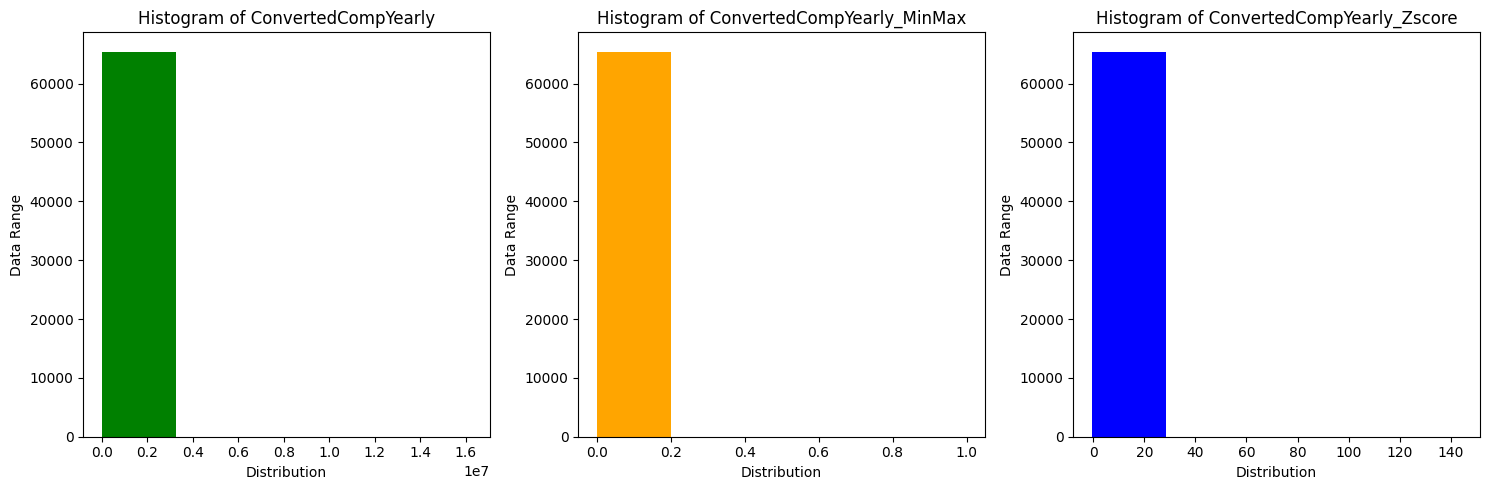

In [19]:
## Write your code here
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=5, color='green')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('Distribution')
plt.ylabel('Data Range')

plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=5, color='orange')
plt.title('Histogram of ConvertedCompYearly_MinMax')
plt.xlabel('Distribution')
plt.ylabel('Data Range')

plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_zScore'], bins=5, color='blue')
plt.title('Histogram of ConvertedCompYearly_Zscore')
plt.xlabel('Distribution')
plt.ylabel('Data Range')

plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
